<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 40px;'>👾</span>
  <span style='font-weight: normal; font-size: 32px; color: #00AF6C;'>Case técnico STONE -</span>
  <span style='font-weight: bold; font-size: 32px; color: #00AF6C;'> Cientista de dados III</span>
</div>
<br>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-weight: normal; font-size: 19px; color: #F;'>Etapa 1: Características de transações e-commerce</span>
</div>

<p style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-style: italic; color: #008250; font-size: 15px;'>
  Insights se concentram na parte final do notebook

<br><br><br>

In [1]:
import pandas as pd
import numpy as np
import os, sys
import datetime as dt
from datetime import datetime

sys.path.insert(0, os.path.abspath(".."))
from src import utils as ult
from dotenv import load_dotenv ; load_dotenv()

# Importando plot functions
from src import plot_utils as plu

# Desligando warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Coleta o path_start, basicamente o local da pasta onde estão os dados.
path_start = os.getenv("PATH_START")
df = pd.read_csv(f"{path_start}data\\silver_dados_stone.csv")
df.drop(['Unnamed: 0'],axis=1, inplace=True) ; df.info()

# Incluindo apenas análise dos trainers devido a ausência da label de CBK na Aba 2
df = df[df['label'] == 'trainer']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dia     22948 non-null  object 
 1   Hora    22948 non-null  object 
 2   Valor   22948 non-null  float64
 3   Cartão  22948 non-null  object 
 4   CBK     11128 non-null  object 
 5   label   22948 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


<br><br><br><br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #00AF6C;'>Quais são as características gerais desse e-commerce</span>
</div>

<br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-weight: bold; font-size: 25px; color: #008250;'>Contexto</span>
</div>

<p style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-style: italic; color: #008250; font-size: 20px;'>
  Realizando as análises via plots e estatísticas

<br><br>

In [10]:
plu.calculate_statistics(df=df)

##################################################################################
O total de revenue em risco devido a cbk é 104847.86
A taxa de risco de cbk desse e-commerce é 7.27%
O revenue garantido desse e-commerce no mes de maio é 1336785.39
CBK Rate desse e-commerce 5.14%
Qtd de operações de CBK 572
##################################################################################


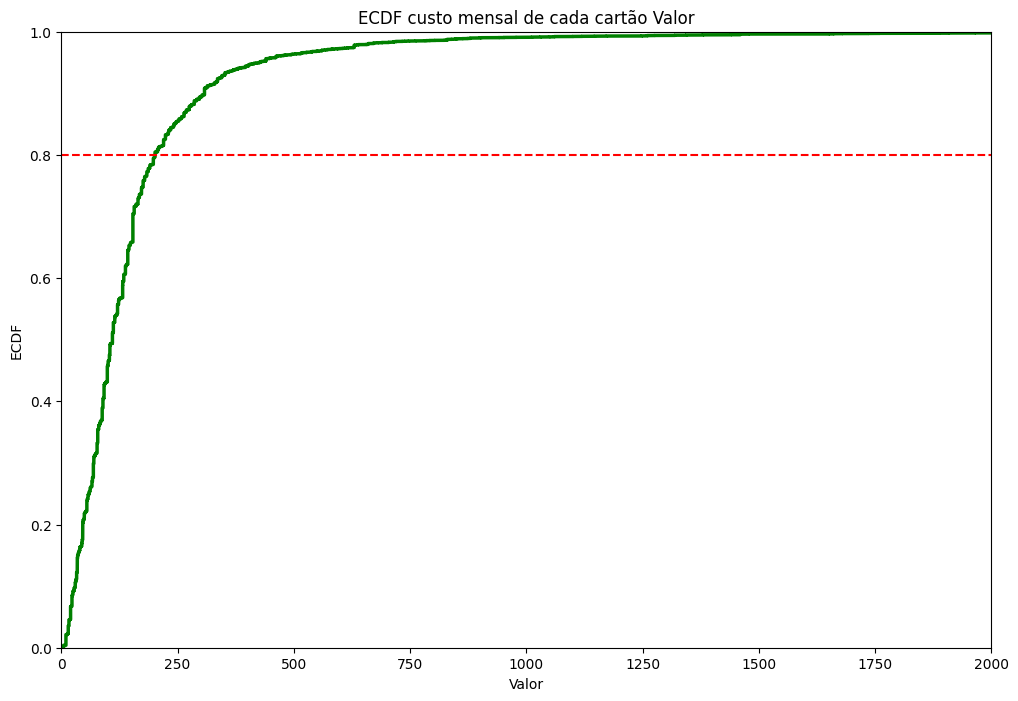

In [11]:
plu.plot_ecdf_geral(
    df=df.groupby(['Cartão'])['Valor'].sum().reset_index(),
    col='Valor'
)

Q1: 59.99 | Mediana: 110.0 | Q3: 176.0


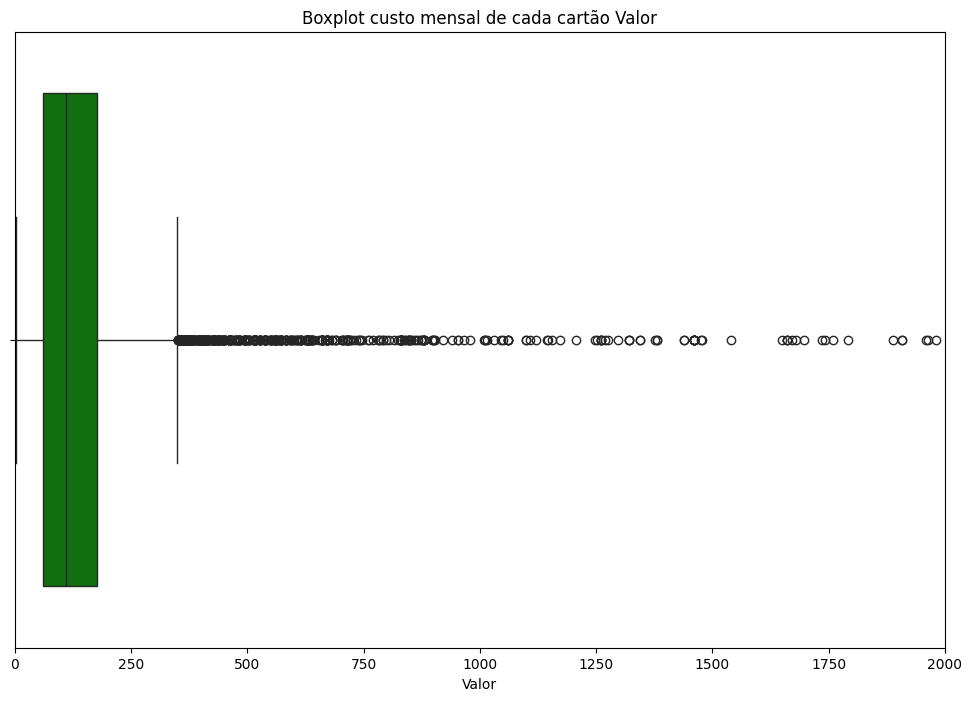

In [12]:
plu.plot_box_plot(
    df=df.groupby(['Cartão'])['Valor'].sum().reset_index(),
    col='Valor'
)

In [13]:
plu.calculate_ticket_medio(df=df)

########################################################################
O ticket médio por operação é 129.55007638389648 com uma desvio padrão 141.42055367850617
########################################################################


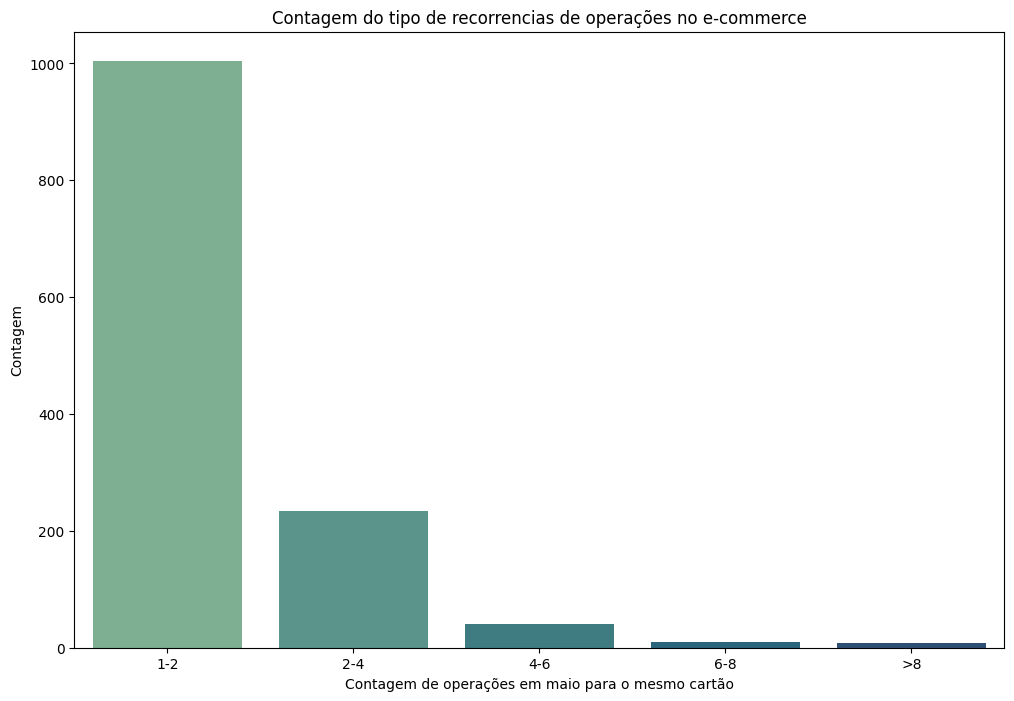

In [14]:
plu.plot_count_opers(df=df)

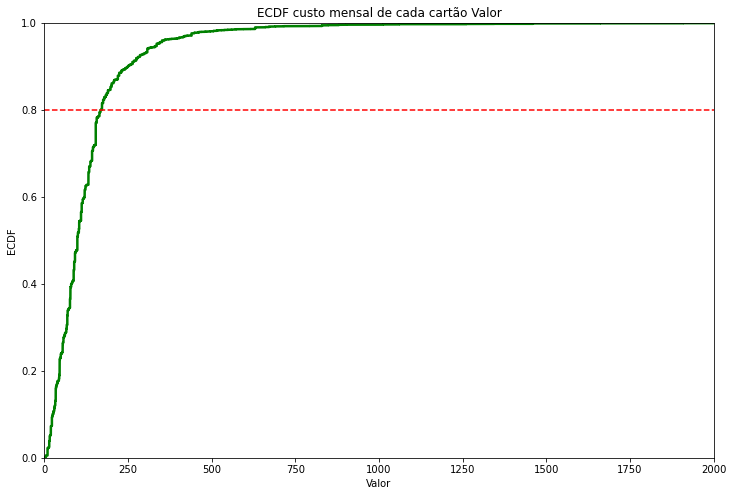

count    11128.000000
mean       129.550076
std        141.420554
min          1.000000
25%         55.000000
50%         99.000000
75%        154.000000
max       2920.000000
Name: Valor, dtype: float64

In [8]:
plu.plot_ecdf_geral(
    df=df,
    col='Valor'
)

df['Valor'].describe()

<br><br><br><br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #00AF6C;'>Analisando operações pelo momento do dia (shift)</span>
</div>

<br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-weight: bold; font-size: 25px; color: #008250;'>Contexto</span>
</div>

<p style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-style: italic; color: #008250; font-size: 20px;'>
  Dividimos os horários do dia em 4 shifts e analisamos o momento do dia

<br><br>

In [5]:
df['dia_hora'] = pd.to_datetime(df['Dia'] + ' ' + df['Hora'])
df['hour'] = df.apply(lambda x: x['dia_hora'].hour,axis=1)
df['shift'] = pd.cut(df['hour'], bins=[0, 7, 12, 18, 24], labels=["1", "2", "3", "4"], right=False)

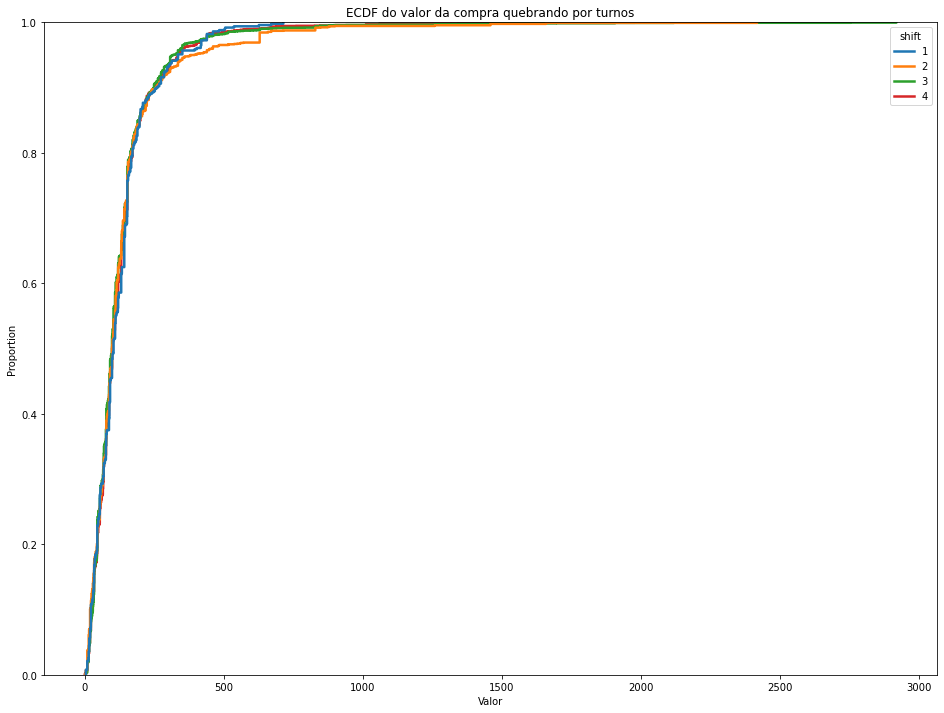

In [10]:
plu.plot_multiple_ecdf(df=df, 
                       plotting_var='Valor', 
                       hue_var='shift')

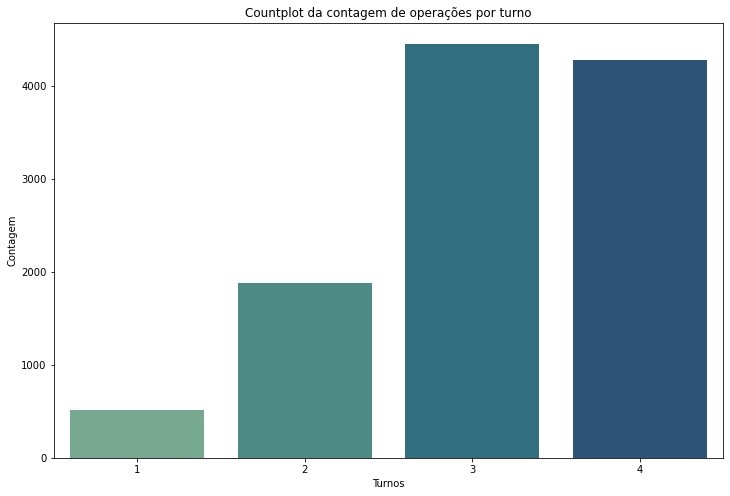

In [11]:
plu.plot_count_shift(df=df)

<br><br><br><br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #00AF6C;'>Analisando operações pelo dia da semana</span>
</div>

<br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-weight: bold; font-size: 25px; color: #008250;'>Contexto</span>
</div>

<p style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-style: italic; color: #008250; font-size: 20px;'>
  Analisando se existe impacto o dia da semana e o momento do dia

<br><br>

In [6]:
df['weekday'] = df.apply(lambda x: x['dia_hora'].strftime("%A")[:3],axis=1)
weekday_mapping = {'Mon': 1, 
                   'Tue': 2, 
                   'Wed': 3, 
                   'Thu': 4, 
                   'Fri': 5, 
                   'Sat': 6, 
                   'Sun': 7}
df['weekday_num'] = df['weekday'].map(weekday_mapping)

In [7]:
df_grouped = df.groupby(['shift','weekday_num']).agg(
    count_operations=('Valor','count'),
    mean_valor=('Valor','mean'),
    soma_valor=('Valor','sum'),
    mediana_valor=('Valor','median')
)
df_grouped_complete = df_grouped.reset_index()\
                                .sort_values(by=['shift','weekday_num'])

df_grouped_infos = df.groupby(['shift']).agg(
    count=('Dia','count'),
    soma_total=('Valor','sum')
).reset_index()

df_grouped_complete = df_grouped_complete.merge(df_grouped_infos, on=['shift'], how='left')
df_grouped_complete['PropCount'] = df_grouped_complete.apply(lambda x: round(x['count_operations']/x['count'],2),axis=1)
df_grouped_complete['PropSoma'] = df_grouped_complete.apply(lambda x: round(x['soma_valor']/x['soma_total'],2),axis=1)

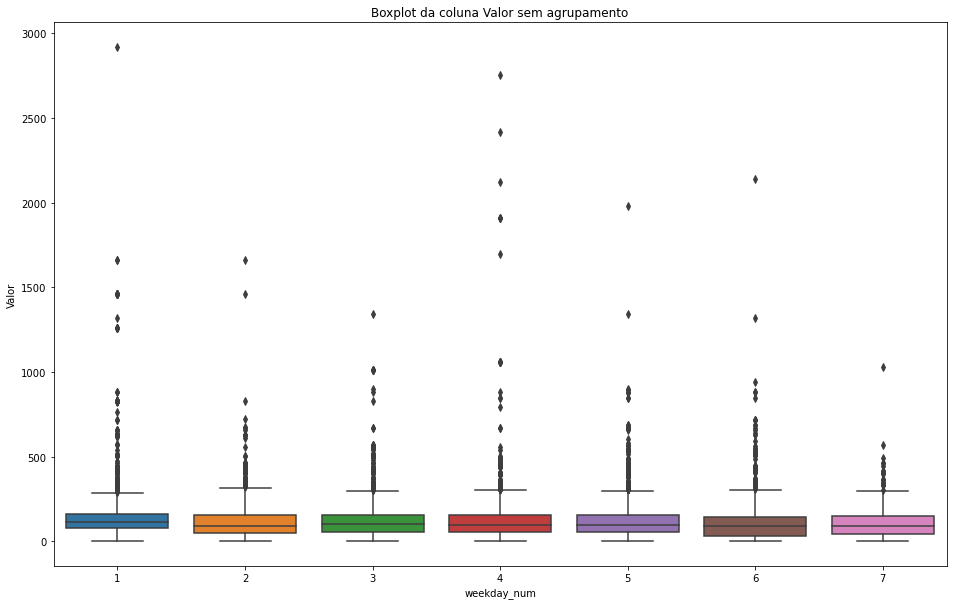

In [7]:
df_counter = df.groupby(['weekday_num']).agg(
    count_operations=('Valor','count'),
    sum_operations=('Valor','sum')
).reset_index()

plu.plot_box_plot_hue(
    df=df,
    y='Valor',
    col='weekday_num'
)

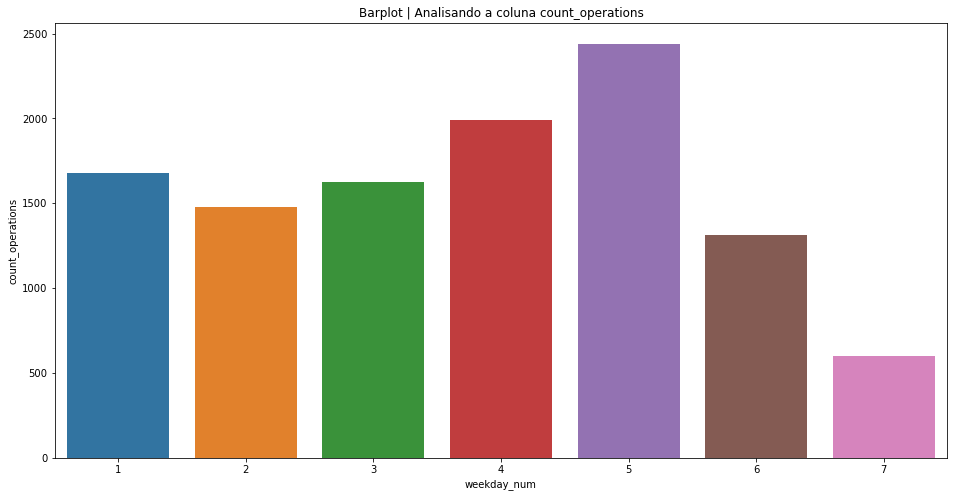

In [8]:
plu.plot_barplot_agg(df=df_counter, x='weekday_num', y='count_operations')

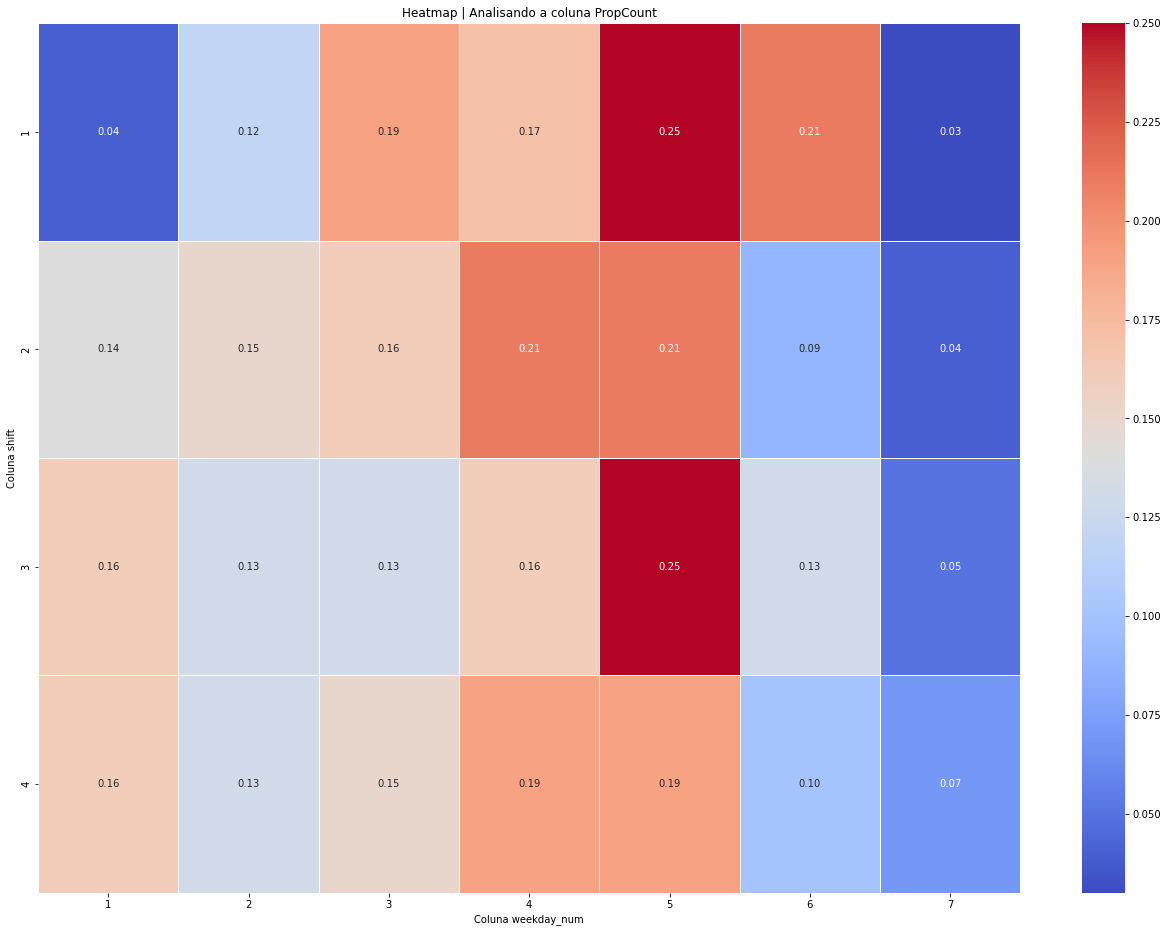

In [6]:
plu.plot_heatmap(df=df_grouped_complete, 
                 index='shift', 
                 columns='weekday_num', 
                 values='PropCount')

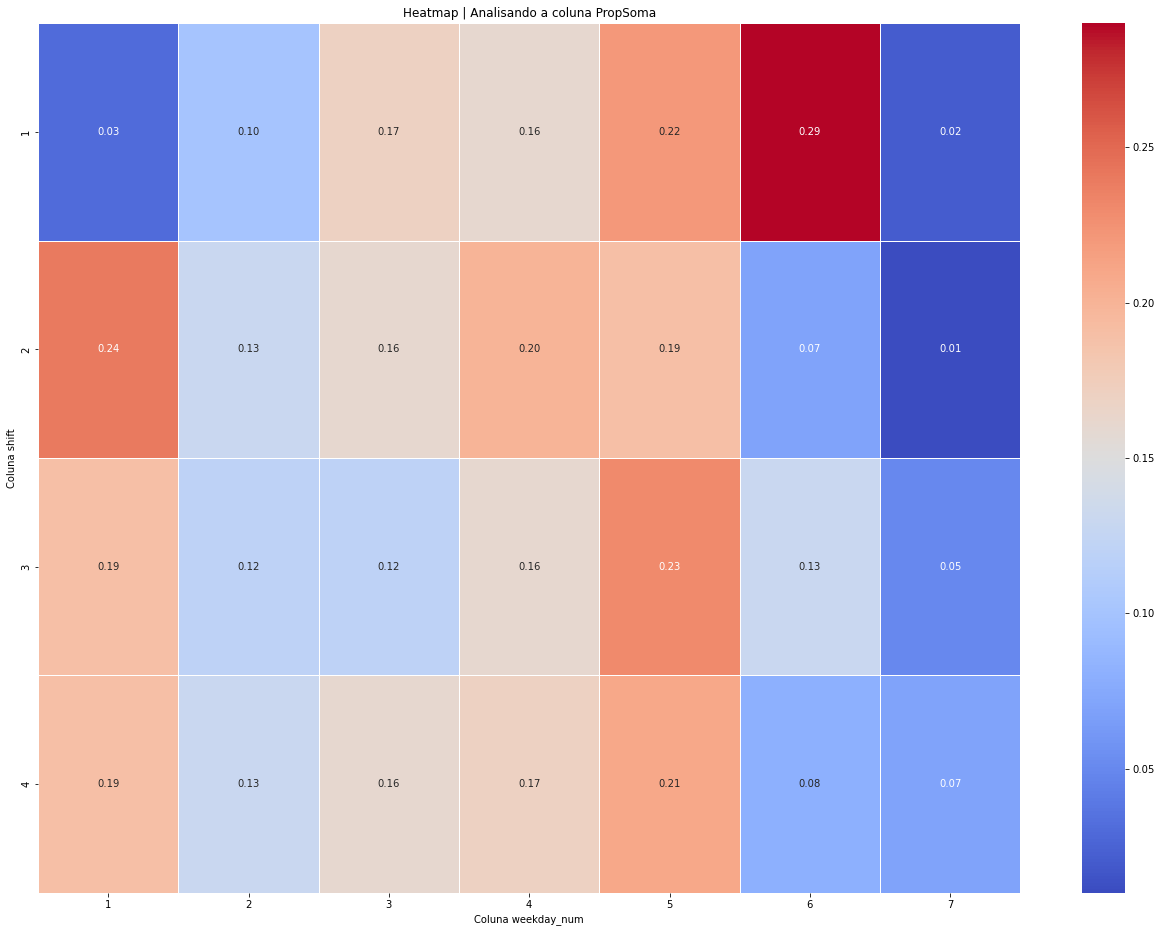

In [7]:
plu.plot_heatmap(df=df_grouped_complete, 
                 index='shift', 
                 columns='weekday_num', 
                 values='PropSoma')

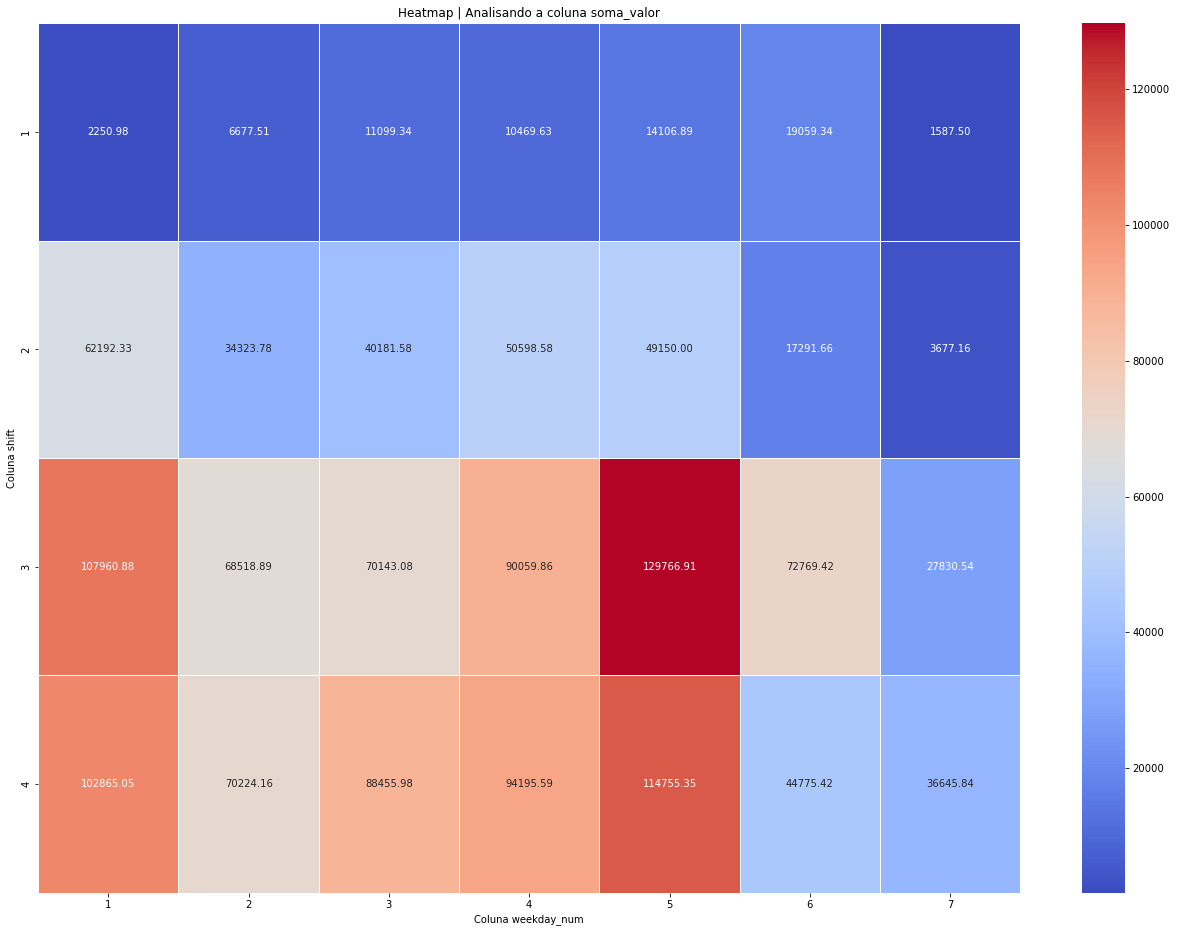

In [10]:
plu.plot_heatmap(df=df_grouped_complete, 
                 index='shift', 
                 columns='weekday_num', 
                 values='soma_valor')

<br><br><br><br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #00AF6C;'>Analise operações pelo número da semana e dia da semana</span>
</div>

<br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-weight: bold; font-size: 25px; color: #008250;'>Contexto</span>
</div>

<p style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-style: italic; color: #008250; font-size: 20px;'>
  Analisando se existe impacto do e-commerce do número da semana e dia da semana

<br><br>

In [8]:
df['week_number_month'] = df.apply(lambda x: (x['dia_hora'].day -1) // 7 + 1, axis=1)

df_grouped_week_number = df.groupby([
    'weekday_num',
    'week_number_month'
]).agg(
    count_operations=('Valor','count'),
    mean_valor=('Valor','mean'),
    soma_valor=('Valor','sum'),
    mediana_valor=('Valor','median')
)
df_grouped_week_number_complete = df_grouped_week_number.reset_index()\
                                                        .sort_values(by=['weekday_num','week_number_month'])

df_grouped_week_number_infos = df.groupby(['week_number_month']).agg(
    count=('Dia','count'),
    soma_total=('Valor','sum')
).reset_index()

df_grouped_week_number_complete_joined = df_grouped_week_number_complete.merge(df_grouped_week_number_infos, on=['week_number_month'], how='left')
df_grouped_week_number_complete_joined['PropCount'] = df_grouped_week_number_complete_joined.apply(lambda x: round(x['count_operations']/x['count'],2),axis=1)
df_grouped_week_number_complete_joined['PropSoma'] = df_grouped_week_number_complete_joined.apply(lambda x: round(x['soma_valor']/x['soma_total'],2),axis=1)
df_plot_week_number = df_grouped_week_number_complete_joined.query("~(mean_valor != mean_valor)")

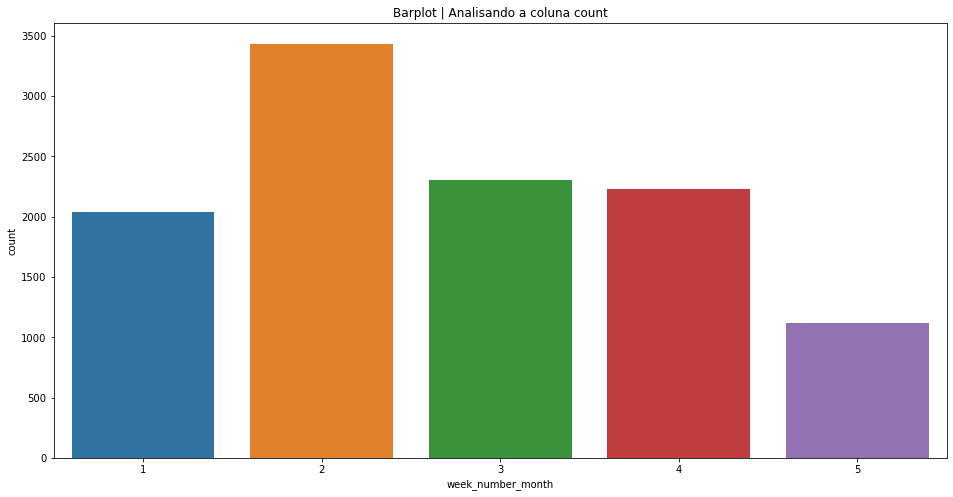

In [38]:
plu.plot_barplot_agg(df=df_grouped_week_number_infos, x='week_number_month', y='count')

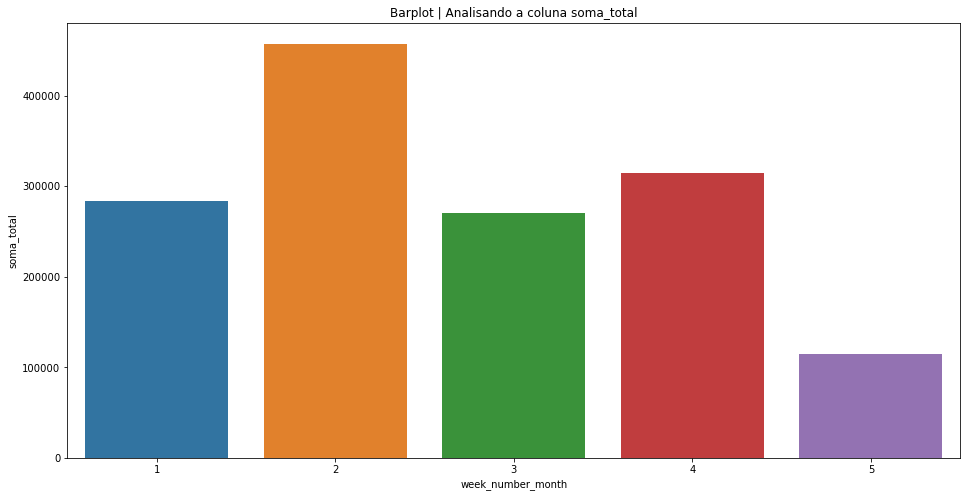

In [42]:
plu.plot_barplot_agg(df=df_grouped_week_number_infos, x='week_number_month', y='soma_total')

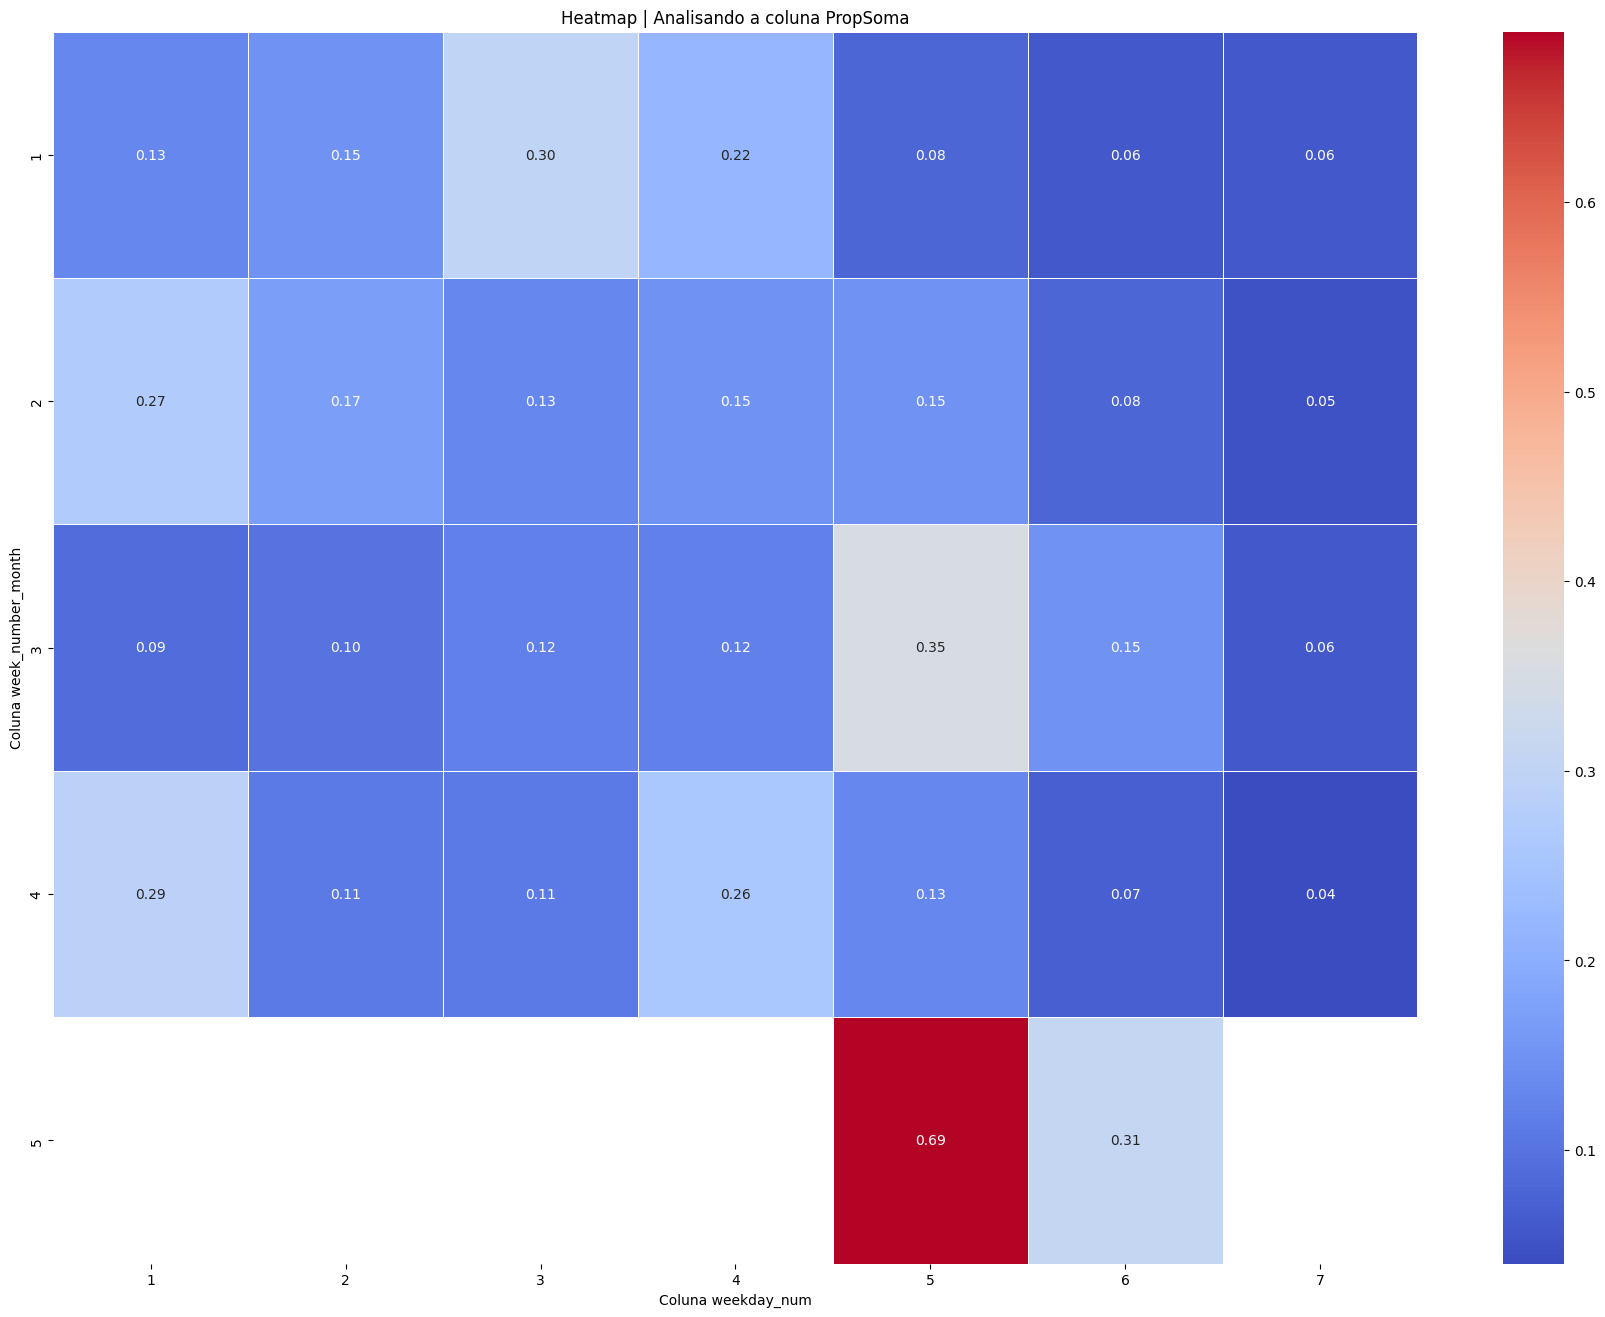

In [9]:
plu.plot_heatmap(df=df_plot_week_number .reset_index(drop=True), 
                 index='week_number_month', 
                 columns='weekday_num', 
                 values='PropSoma')

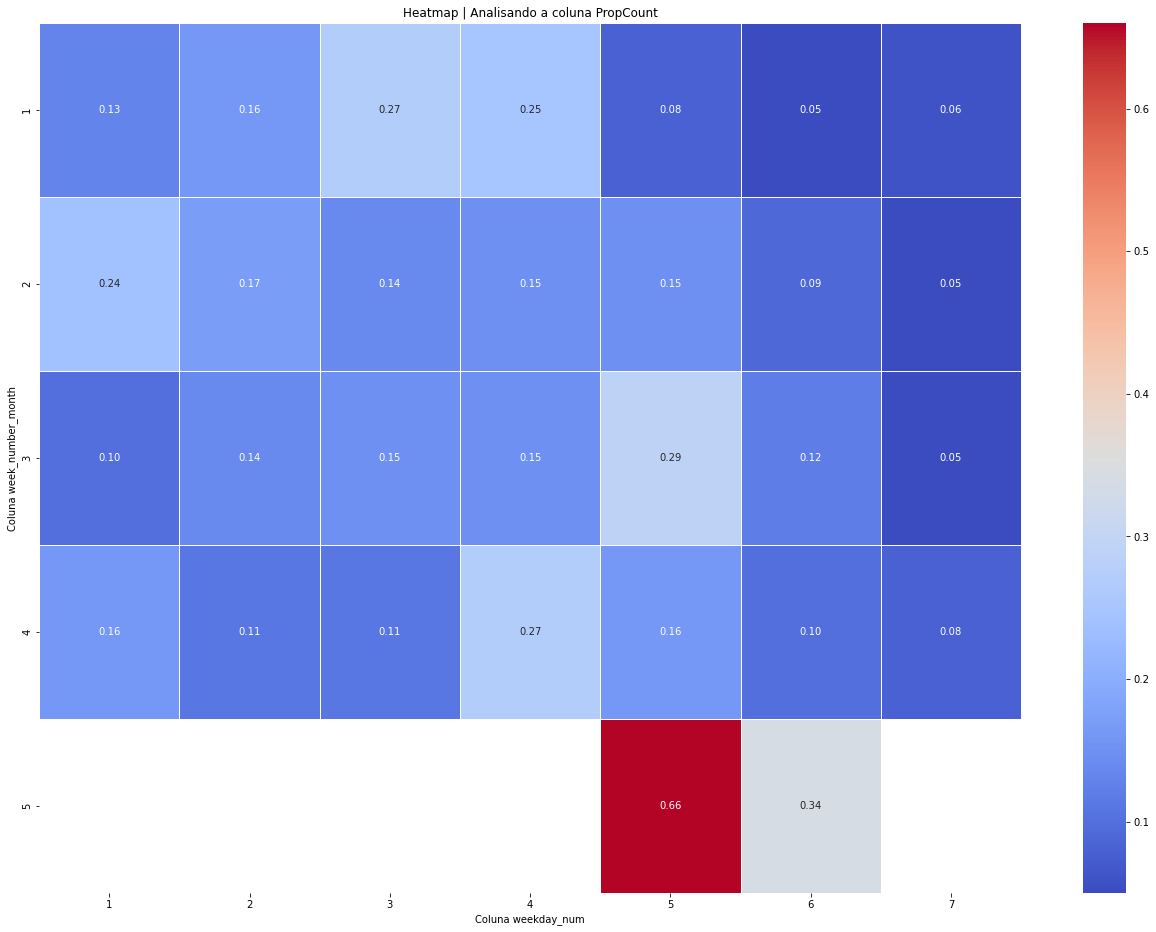

In [35]:
plu.plot_heatmap(df=df_plot_week_number .reset_index(drop=True), 
                 index='week_number_month', 
                 columns='weekday_num', 
                 values='PropCount')

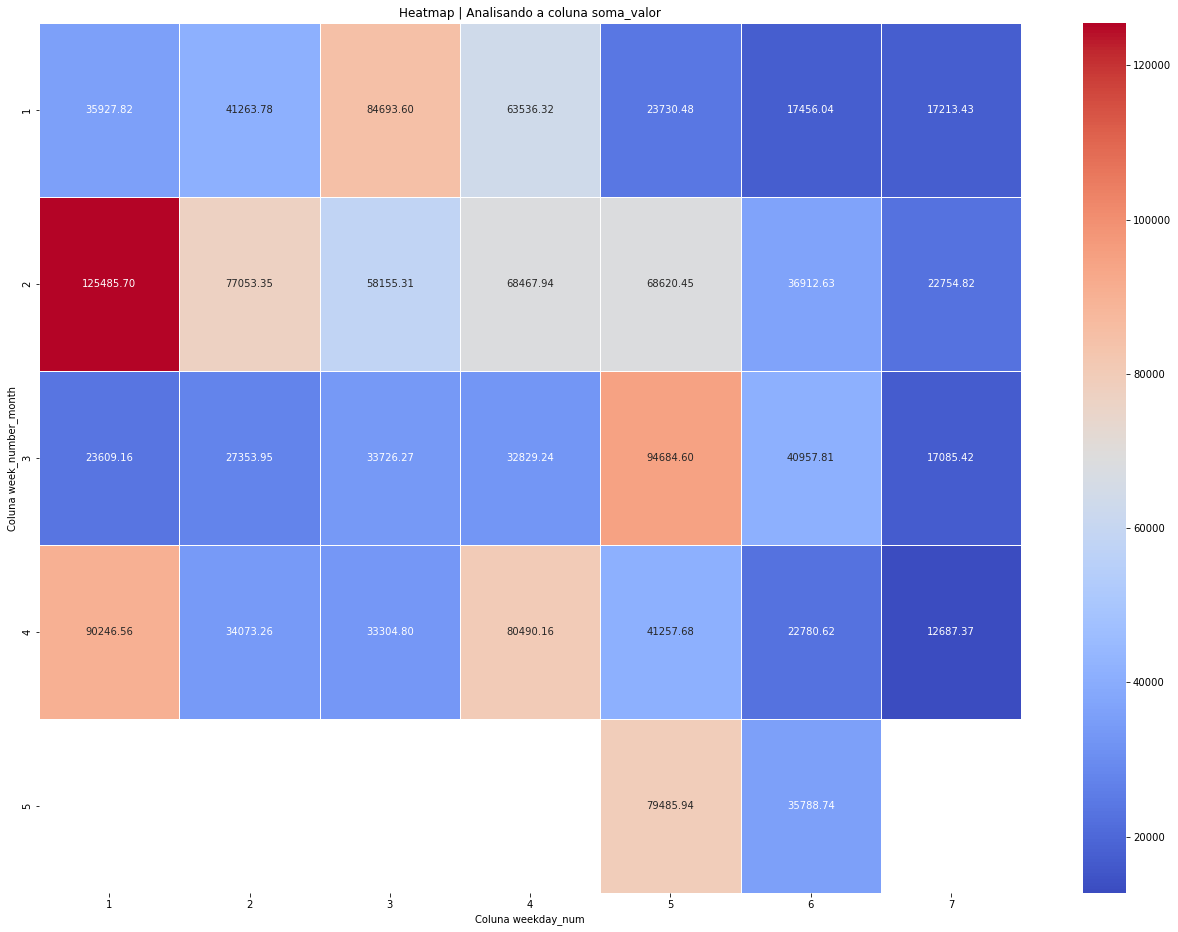

In [34]:
plu.plot_heatmap(df=df_plot_week_number .reset_index(drop=True), 
                 index='week_number_month', 
                 columns='weekday_num', 
                 values='soma_valor')

<br><br><br><br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #00AF6C;'>Analise basal das estatísticas da operação do e-commerce</span>
</div>

<br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-weight: bold; font-size: 25px; color: #008250;'>Contexto</span>
</div>

<p style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-style: italic; color: #008250; font-size: 20px;'>
  Analisando replicação do revenue e da qtd de vendas diárias

<br><br>

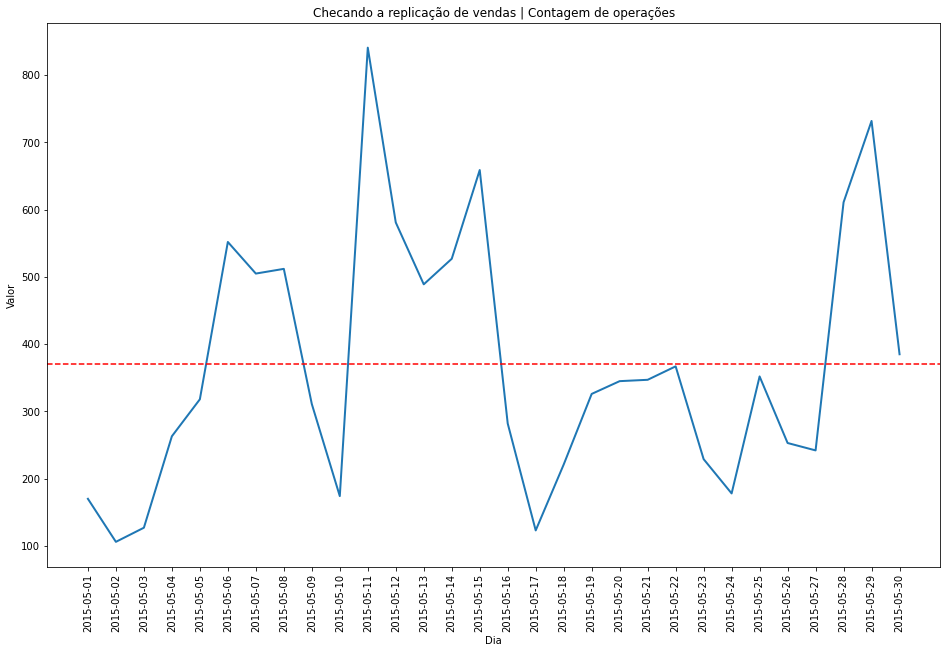

In [10]:
data = df.groupby(['Dia'])['Valor'].count().reset_index()
plu.plot_everyday_sells(df=data, y='Valor', stringer='Contagem de operações')

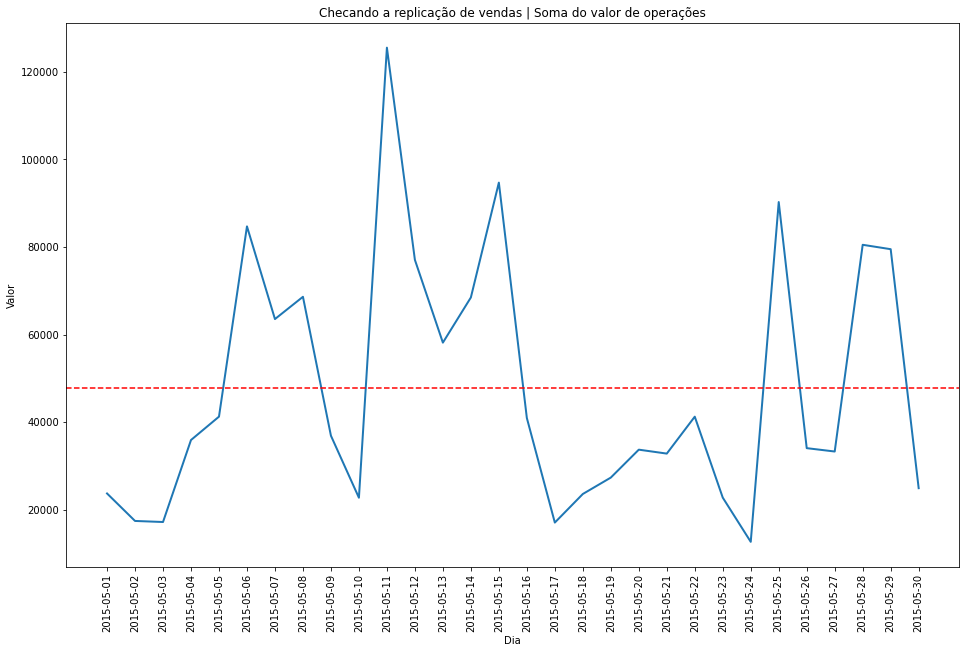

In [7]:
data = df.groupby(['Dia'])['Valor'].sum().reset_index()
plu.plot_everyday_sells(df=data, y='Valor', stringer='Soma do valor de operações')

<br><br><br><br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #00AF6C;'>Formalizando Insights</span>
</div>

<br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-weight: bold; font-size: 25px; color: #008250;'>Contexto</span>
</div>

<br><br>

<div style='text-align: left; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>A quantidade de vendas nos shifts da madrugada são menores</p>
</div>
<div style='text-align: left; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Quinta-feira, sexta-feira e sábado são os dias que mais acontecem vendas</p>
</div>
<div style='text-align: left; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Domingo a venda é muito reduzida</p>
</div>
<div style='text-align: left; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Na semana 2 e 4 do mês de maio aconteceu uma venda muito maior</p>
</div>

<br><br>